# Soal 1. Menentukan jenis data categorical atau numeric
Jelaskan data kategorikal (kualitatif) dan data numerik (kuantitatif)



Jawab disini:

Data kategorikal adalah data yang berdasarkan kategori, misalkan warna, jenis kelamin, tempat tinggal, dll

Data numerik adalah data yang berdasarkan numerikal(angka), misalkan tinggi badan, nilai, ipk, gaji, dll



---



---



---



Download [austin_weather.csv](https://drive.google.com/uc?export=download&id=19Yc404D3U3OPPoUP8J1pXETlTmA4hOOX)

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('austin_weather.csv')
df.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,12/21/2013,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,12/22/2013,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,12/23/2013,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,12/24/2013,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,12/25/2013,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 610 to 1029
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        1000 non-null   object 
 1   TempHighF                   1000 non-null   int64  
 2   TempAvgF                    995 non-null    float64
 3   TempLowF                    1000 non-null   int64  
 4   DewPointHighF               993 non-null    float64
 5   DewPointAvgF                989 non-null    float64
 6   DewPointLowF                993 non-null    float64
 7   HumidityHighPercent         998 non-null    float64
 8   HumidityAvgPercent          992 non-null    float64
 9   HumidityLowPercent          998 non-null    float64
 10  SeaLevelPressureHighInches  997 non-null    float64
 11  SeaLevelPressureAvgInches   997 non-null    float64
 12  SeaLevelPressureLowInches   997 non-null    float64
 13  VisibilityHighMiles         992

In [8]:
df = df.sample(1000)

<h2>Soal 2. Visualisasi Scatter Plot dengan memiliki missing value </h2>

Pada tugas kali ini kita akan mengamati nilai DewPointAvg (F) dengan mengamati nilai  HumidityAvg (%), TempAvg (F), dan WindAvg (MPG)

Perhatikan bahwa data kita tidaklah siap untuk di analisis, salah satunya tipe data dari DewPointAvg (F), HumidityAvg (%), dan WindAvg (MPG) adalah object, padahalnya data nya ber isi numeric. maka :
- Ubahlah tipe data tersebut menjadi tipe data float

Kemudian: 

- Kalian tidak akan dengan mudah mengubah tipe data tersebut karena column tersebut mempunyai nilai '-' dan 'na' yang dianggap sebagai missing value,  namun data ini tidak bisa di ubah ke bentuk float, maka ubahlah data tersebut menjadi NaN dengan menambahkan argumen na_values=['na', '-'] saat menggunakan atribut pd.read_csv('nama file.csv'. na_values=..]
- Sekarang ubah tipe datanya dengan float, gunakan method .astype(), baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html

Setelah ini sebagian data siap untuk di jadikan bahan analisis. maka:

a. Buahlah visualisasi scatter plot menggunakan sample(1000), sehingga menghasilkan gambar seperti dibawah:

ket: 

- colormap adalah 'coolwarm'
- berikat warna terhadap setiap data poin dengan nilai dari column TempAvgF
- berikan size terhadap setiap data poin dengan nilai dari column WindAvgMPH, kalikan dengan 20 agar size terlihat lebih besar


b. Kemudian bandingkan data visualisasi diatas dengan visualisasi data (sample=1000) setelah handling missing value menggunakan:
- Isi nilai nan dengan nilai sebelumnya di row tersebut. gunakan method .fillna() dengan argument method bernilai 'ffill', baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

#                     **Expected output**

#                     **Tanpa Handling missing value**

![tanpa handling missing value](https://drive.google.com/uc?id=1FYJkCwAfm8f3jyNdzOnCvp15hS_DixHr)

##                    **Dengan Handling missing value**
![dengan handling missing value](https://drive.google.com/uc?id=1nqZuPdBsqSsOud-_XuBGujDAcJWEEvIr)

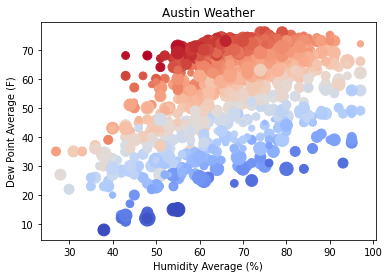

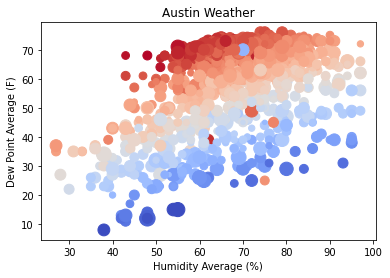

In [16]:
# code here
# Gambar pertama
df = pd.read_csv('austin_weather.csv', na_values=["na","-"])
df = df.astype({'HumidityAvgPercent': 'float',
                'TempAvgF': 'float',
                'WindAvgMPH': 'float',
                })
df = df.sample(1000)

plt.scatter(x="HumidityAvgPercent", 
            y= "DewPointAvgF",
            c= "TempAvgF",
            s= df['WindAvgMPH']*20, 
            cmap= "coolwarm",
            data=df)
plt.xlabel("Humidity Average (%)")
plt.ylabel("Dew Point Average (F)")
plt.title("Austin Weather")
plt.show()

#Gambar kedua
df = df.fillna(method='ffill')
plt.scatter(x="HumidityAvgPercent", 
            y= "DewPointAvgF",
            c= "TempAvgF",
            s= df['WindAvgMPH']*20, 
            cmap= "coolwarm",
            data=df)
plt.xlabel("Humidity Average (%)")
plt.ylabel("Dew Point Average (F)")
plt.title("Austin Weather")
plt.show()

Analisa :

Terlihat perbedaan jika missing value telah diisi. Jadi, sangat berdampak sebuah analisis untuk mengisi missing value tersebut

Download [price.csv](https://drive.google.com/uc?export=download&id=1LfuQmLb8AZxAvJzgWJ3u4h49EoTGqO-R)

In [22]:
df2 = pd.read_csv('price.csv')
df2.head()

,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
0,1,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,2,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
2,3,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
3,4,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,5,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000


---

<h2>Soal 3. Visualisasi Data with Handling outliers </h2>

Pada tugas kali ini, kita akan melakukan handling outliers. Outliers ditemukan pada kolom 'House_Price' dengan menggunakan boxplot dari library seaborn seperti gambar berikut: 


![boxplot1](https://drive.google.com/uc?id=1y2jRwf8zRPXQtSBkmjJLcqUm4l6DR7d9)


Dengan menggunakan Interquartile range, kita bisa temukan nilai data outliers dan meremove data outlier tersebut. 

*   Tentukan nilai batas atas dan batas bawah dari Interquartile range tersebut
*   Remove data outliers tersebut menggunakan batas atas dan batas bawah
*   Visualisasikan hasil data yang sudah d remove outliers seperti expected berikut:







**EXPECTED OUTPUT:**

Batas bawah & batas atas:

871625.0 10976625.0

Visualisasi boxplot:

![boxplot2](https://drive.google.com/uc?id=1qZc-lEa5FUzSQ_cyt4_GJQ0TZ8c6WjHX)





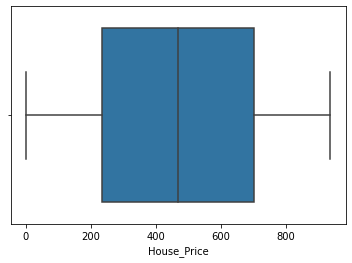

In [24]:
#Code here
import seaborn as sns
Lower_bound = 871625.0
Upper_bound = 10976625.0

df2['House_Price'] = df2[(df2['House_Price']>Lower_bound) & (df2['House_Price']<Upper_bound)]

sns.boxplot(data=df2,x="House_Price")
plt.show()